# 案例：用 OpenCV 来识别图片中的围棋子

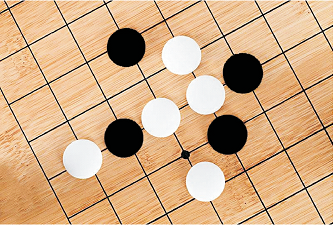

本案例学习OpenCV的一些基本使用，包括：
<ul>
    <li>读取图片文件</li>
    <li>图片的模糊，颜色空间的转换，二值化等处理</li>
    <li>画圆</li>
    <li>ROI(Region of Interest)提取</li>
    <li>检测圆等</li>
</ul>

这个案例主要用了 Opencv中的霍夫圆环检测来检测图片中的圆,霍夫圆环检测函数为:

HoughCircles(image,method,dp,minDist,circles=None,param1=None,param2=None,minRadius=None,maxRadius=None)

<ul>
<li>image:8位,单通道图像。如果使用彩色图像,需要先转换为灰度图像。</li>
<li>method:定义检测图像中圆的方法。目前唯一实现的方法是cv2.HOUGH_GRADIENT。</li>
<li>dp:累加器分辨率与图像分辨率的反比。dp获取越大,累加器数组越小。</li>
<li>minDist:检测到的圆的中心,(x,y)坐标之间的最小距离。如果minDist太小,则可能导致检测到多个相邻的圆。如果minDist太大,则可能导致很多圆检测不到。</li>
<li>param1:用于处理边缘检测的梯度值方法。</li>
<li>param2:cv2.HOUGH_GRADIENT方法的累加器阈值。阈值越小,检测到的圈子越多。</li>
<li>minRadius:半径的最小大小(以像素为单位)。</li>
<li>maxRadius:半径的最大大小(以像素为单位)。
    </li></ul>

In [1]:
import cv2
import numpy as np
from collections import Counter

In [2]:
#检查棋子是黑色还是白色
def detect_go(img):
    txt='black'
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,threshold= cv2.threshold(gray,100,255,cv2.THRESH_BINARY)#返回值ret是设定的阈值，threshold是输出的图像（二值图像）
    c= Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt='white'
    return txt,threshold

In [3]:
img= cv2.imread('go.png')
img= cv2.medianBlur(img,5)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
circles= cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=100,param2=25,minRadius=20,maxRadius=50)
if circles is None:
    exit(-1)
circles= np.uint16(np.around(circles))

for i in circles[0,:]:
    x,y,r = i
    cv2.circle(img,(x,y),r,(0,255,0),2)
    cv2.circle(img,(x,y),2,(0,0,255),3)
    
    crop_img= img[y-r:y+r,x-r:x+r]
    txt,threshold= detect_go(crop_img)
    print('颜色','黑色' if txt=='black' else '白色')
cv2.imshow('detectedGO',img)
cv2.waitKey(1500)
cv2.waitKey(0)
cv2.destroyAllWindows()

[(0, 4439), (255, 1645)]
颜色 黑色
[(0, 4694), (255, 1706)]
颜色 黑色
[(255, 6001), (0, 83)]
颜色 白色
[(0, 4254), (255, 1522)]
颜色 黑色
[(255, 6029), (0, 55)]
颜色 白色
[(255, 6325), (0, 75)]
颜色 白色
[(255, 6340), (0, 60)]
颜色 白色
[(255, 6573), (0, 151)]
颜色 白色
[(0, 4926), (255, 1798)]
颜色 黑色


In [5]:
help(cv2.HoughCircles)

Help on built-in function HoughCircles:

HoughCircles(...)
    HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    .   @brief Finds circles in a grayscale image using the Hough transform.
    .   
    .   The function finds circles in a grayscale image using a modification of the Hough transform.
    .   
    .   Example: :
    .   @include snippets/imgproc_HoughLinesCircles.cpp
    .   
    .   @note Usually the function detects the centers of circles well. However, it may fail to find correct
    .   radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
    .   you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
    .   to return centers only without radius search, and find the correct radius using an additional procedure.
    .   
    .   It also helps to smooth image a bit unless it's already soft. For example,
    .   GaussianBlur